In [211]:
import pandas as pd
import seaborn as sns
import numpy as np
from  scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import math
import csv
from matplotlib import font_manager

In [212]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 76B6-C922

 Directory of C:\Users\natha\OneDrive\Documents\Python Scripts\python_analysis_scripts\RMSD

2023-03-15  07:22 PM    <DIR>          .
2023-03-15  07:22 PM    <DIR>          ..
2023-03-15  04:00 PM    <DIR>          .ipynb_checkpoints
2023-03-15  07:21 PM            41,509 aag RMSD.png
2023-03-15  07:21 PM            35,667 aag-above RMSD.png
2023-03-15  03:55 PM            48,024 aag-above-RMSD.out
2023-03-15  07:22 PM            57,873 aag-below RMSD.png
2023-03-15  03:57 PM            48,024 aag-below-RMSD.out
2023-03-15  03:57 PM            44,022 aag-RMSD.out
2023-03-15  07:22 PM           388,693 Linear_Interaction_Energy_Processing.ipynb
               7 File(s)        663,812 bytes
               3 Dir(s)  469,389,094,912 bytes free


In [213]:
#Here you define the Property for graph
Property_for_axis = "RMSD (Ang)"

In [214]:
#Define Property you are looking at
Property = "RMSD"

In [287]:
#Define statistic column name
stat_column_names_sys1 = ['aag']
stat_column_names_sys2 = ['aag-above']
stat_column_names_sys3 = ['aag-below']

In [288]:
#Define axis range
xmin = 0
xmax = 2000
ymin = 0
ymax = 2000

In [289]:
#define axis label font
font1 = {'family':'arial','color':'black','size':20}

#Define tick font label and size
tickfontname ='arial'
tickfontsize = 17

#define axis label size
graph_label_size=10

In [290]:
#define plot outline width, series width, and plot transparency
plot_outline_width = 3
plotlinewidth = 3
plotalpha = 0.9

#define number of histogram bins
nhistbins = 100

In [291]:
#Define name of each system and property that you are looking at (for figure naming)
system1_name = "aag"
system2_name = "aag-above"
system3_name = "aag-below"

In [292]:
#Provide the names for each figure, there is a solo figure for each time based dataset. Next the datasets will be shown in a combined figure. Next each dataset will be converted into histogram data (3 histogram datasets). Each histogram dataset will be plotted independently, then combine for a figure. Finally, each system will be displayed on a box and whisker plot, as well as a violin plot.
system_1_alone_time = "aag RMSD"
system_2_alone_time = "aag-above RMSD"
system_3_alone_time = "aag-below RMSD"
time_data_together = "all RMSD"
system_1_alone_histogram = "histogram aag RMSD"
system_2_alone_histogram = "histogram aag-above RMSD"
system_3_alone_histogram = "histogram aag-below RMSD"
histogram_together = "histogram all RMSD"
box_plot_together = "box plot all RMSD"
violin_plot_together = "violin all RMSD"

In [293]:
#Here define the colours that each variable should be
system1_colour = "black"
system2_colour = "blue"
system3_colour = "pink"

In [294]:
#define figure dpi here. Type "None" if you do not care
figure_dpi = None

In [295]:
#Read in time-based data file (linear)
system1 = pd.read_csv("aag-RMSD.out",delim_whitespace=True)
system2 = pd.read_csv("aag-above-RMSD.out",delim_whitespace=True)
system3 = pd.read_csv("aag-below-RMSD.out",delim_whitespace=True)

In [296]:
#convert to dataframe
df_system1 = pd.DataFrame(system1)
df_system2 = pd.DataFrame(system2)
df_system3 = pd.DataFrame(system3)

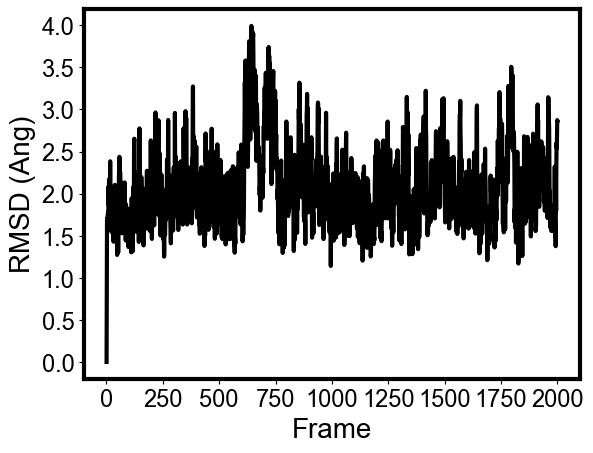

In [297]:
#Plot and save seperate property system1
Frame = list(df_system1.iloc[0:,0])
prop_system1 = list(df_system1.iloc[0::,1])
fig, ax = plt.subplots()
plt.plot(Frame, prop_system1, color = system1_colour, linewidth=plotlinewidth)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_1_alone_time, dpi=figure_dpi)

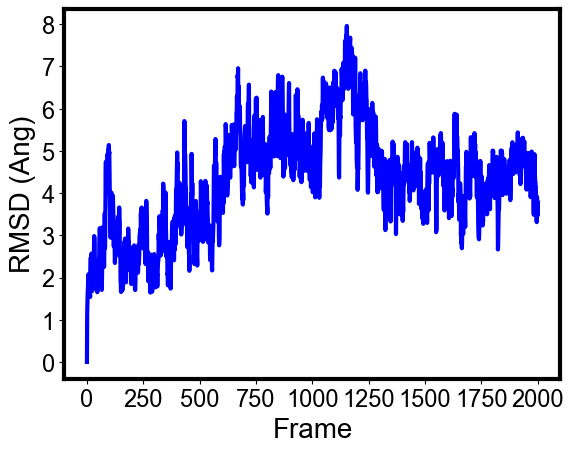

In [298]:
#Plot and save seperate property system2
Frame = list(df_system2.iloc[0:,0])
prop_system2 = list(df_system2.iloc[0::,1])
fig, ax = plt.subplots()
plt.plot(Frame, prop_system2, color = system2_colour, linewidth=plotlinewidth)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_2_alone_time, dpi=figure_dpi)

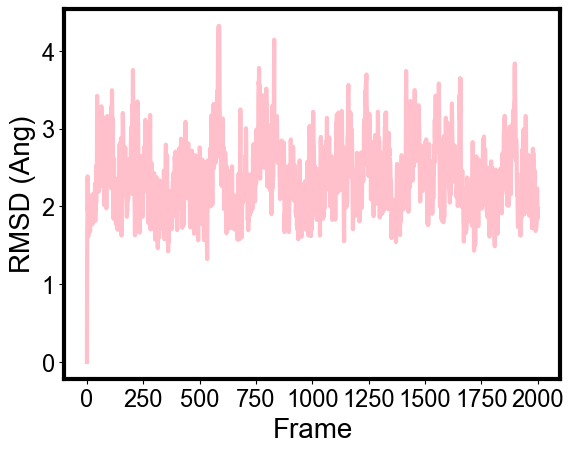

In [299]:
#Plot and save seperate property system3
Frame = list(df_system3.iloc[0:,0])
prop_system3 = list(df_system3.iloc[0::,1])
fig, ax = plt.subplots()
plt.plot(Frame, prop_system3, color = system3_colour, linewidth=plotlinewidth)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_3_alone_time, dpi=figure_dpi)

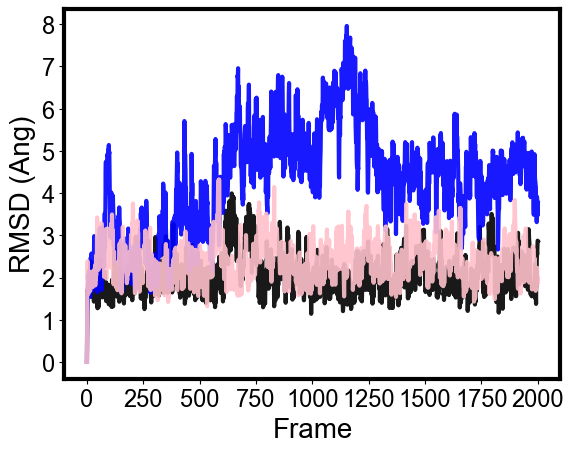

In [300]:
#Plot and save property for all systems
fig, ax = plt.subplots()
plt.plot(Frame, prop_system1, color = system1_colour, linewidth=plotlinewidth, alpha = plotalpha)
plt.plot(Frame, prop_system2, color = system2_colour, linewidth=plotlinewidth, alpha = plotalpha)
plt.plot(Frame, prop_system3, color = system3_colour, linewidth=plotlinewidth, alpha = plotalpha)
#ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(time_data_together, dpi=figure_dpi)

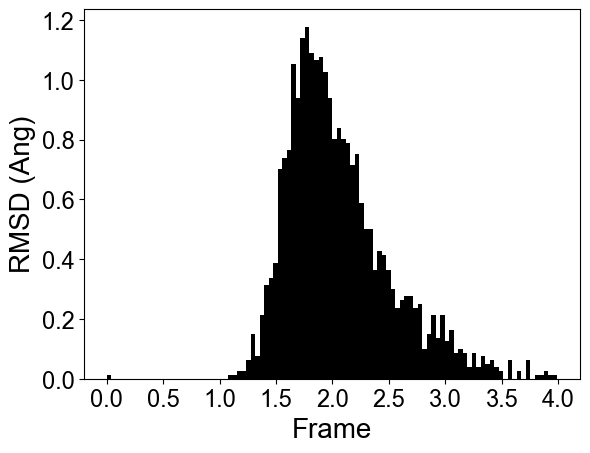

In [301]:
#plot histogram for system 1
plt.hist(prop_system1, density = True, color = system1_colour, linewidth=plotlinewidth, bins = nhistbins) 
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_1_alone_histogram, dpi=figure_dpi)

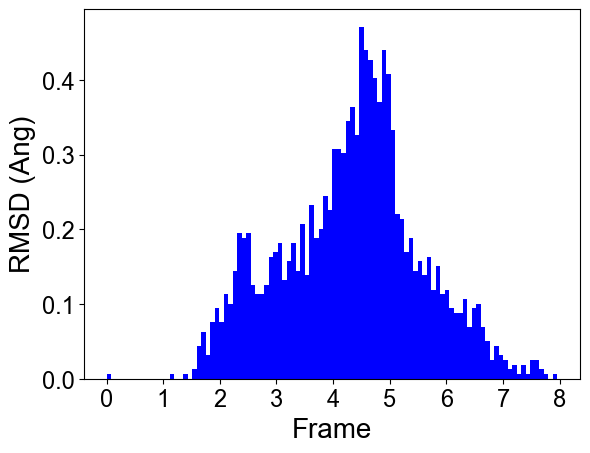

In [302]:
#plot histogram for system 2
plt.hist(prop_system2, density = True, color = system2_colour, linewidth=plotlinewidth, bins = nhistbins) 
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_2_alone_histogram, dpi=figure_dpi)

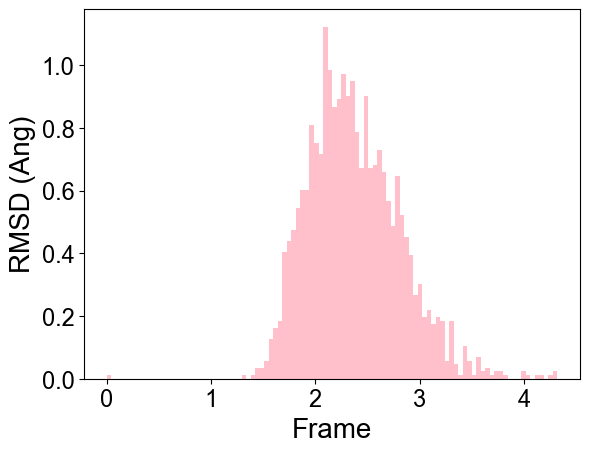

In [303]:
#plot histogram for system 3
plt.hist(prop_system3, density = True, color = system3_colour, linewidth=plotlinewidth, bins = nhistbins) 
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(system_3_alone_histogram, dpi=figure_dpi)

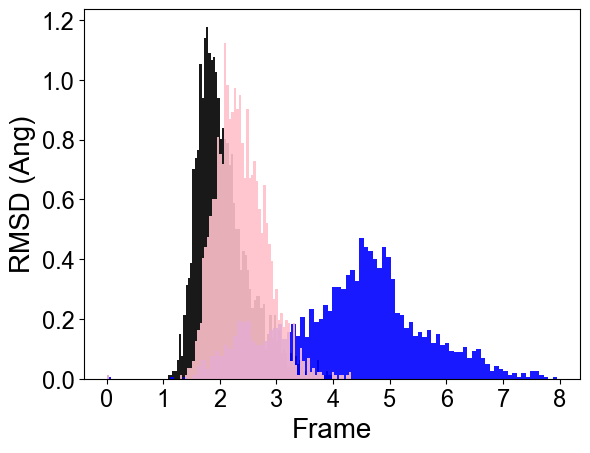

In [304]:
#plot histogram for all systems
plt.hist(prop_system1, density = True, color = system1_colour, linewidth=plotlinewidth, alpha = plotalpha, bins = nhistbins) 
plt.hist(prop_system2, density = True, color = system2_colour, linewidth=plotlinewidth, alpha = plotalpha, bins = nhistbins) 
plt.hist(prop_system3, density = True, color = system3_colour, linewidth=plotlinewidth, alpha = plotalpha, bins = nhistbins) 
plt.ylabel(Property_for_axis, fontdict = font1)
plt.xlabel("Frame", fontdict = font1)
plt.xticks(fontname = tickfontname, fontsize = tickfontsize)
plt.yticks(fontname = tickfontname, fontsize = tickfontsize)
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_linewidth(plot_outline_width)
plt.savefig(histogram_together, dpi=figure_dpi)

In [332]:
#calculate statistics
system1_stats = pd.DataFrame(prop_system1).describe()
system2_stats = pd.DataFrame(prop_system2).describe()
system3_stats = pd.DataFrame(prop_system3).describe()

system1_stats.columns = stat_column_names_sys1
system2_stats.columns = stat_column_names_sys2
system3_stats.columns = stat_column_names_sys3
print(system1_stats)

sys1_stat_properties = list(system1_stats.iloc[0:,0])
sys2_stat_properties = list(system2_stats.iloc[0:,0])
sys3_stat_properties = list(system3_stats.iloc[0:,0])

print(sys1_stat_properties)
print(sys2_stat_properties)
print(sys3_stat_properties)

statcolnames = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
#Transpose dataframes
system1_stats_T = pd.DataFrame(sys1_stat_properties).T
system2_stats_T = pd.DataFrame(sys2_stat_properties).T
system3_stats_T = pd.DataFrame(sys3_stat_properties).T

combine_df = pd.concat(sys1_stat_properties, sys2_stat_properties, sys3_stat_properties)

#
#
#merge_output1 = pd.merge(system1_stats_T, system2_stats_T)
#print(merge_output1)

               aag
count  2000.000000
mean      2.059915
std       0.465704
min       0.000000
25%       1.732275
50%       1.962400
75%       2.287125
max       3.992300
[2000.0, 2.059914999999998, 0.46570357461018336, 0.0, 1.732275, 1.9624000000000001, 2.287125, 3.9923]
[2000.0, 4.321463900000003, 1.2285078909823455, 0.0, 3.4928999999999997, 4.4363, 5.044625, 7.9613]
[2000.0, 2.3727167499999955, 0.4401084489962406, 0.0, 2.059275, 2.3278499999999998, 2.649525, 4.3205]


C:\Users\natha\AppData\Local\Temp\ipykernel_176\4208043997.py:25: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  combine_df = pd.concat(sys1_stat_properties, sys2_stat_properties, sys3_stat_properties)


ValueError: Only can inner (intersect) or outer (union) join the other axis

In [35]:
#Statistics Averaged and Put in a table
VDW_stats = pd.DataFrame(VDW).describe()
ELEC_stats = pd.DataFrame(ELEC).describe()
Total_stats = pd.DataFrame(Total).describe()
print(VDW_stats)
print(ELEC_stats)
print(Total_stats)

                 0
count  5000.000000
mean    -71.894573
std       4.252864
min     -83.606400
25%     -74.820625
50%     -72.350200
75%     -69.410225
max     -52.669900
                 0
count  5000.000000
mean     90.660092
std      33.705900
min     -10.113500
25%      63.759250
50%      90.238600
75%     119.497475
max     181.435300
                 0
count  5000.000000
mean     18.765519
std      31.727846
min     -77.048500
25%      -6.755275
50%      18.669900
75%      45.671225
max     108.661800


In [ ]:
#Print to Bar Graph


In [ ]:
#Print to Box and Whisker

In [ ]:
#Print to Violin Plot
#make violin plot
print(whole_output1.iloc[0:5000,0:9])
ligand_binding_energies = pd.DataFrame(whole_output1.iloc[0:5000,1:9])
#print(whole_output1.iloc[0:5000,1])
seaborn_dataset = pd.DataFrame(ligand_binding_energies.stack().reset_index())
print(seaborn_dataset)
seaborn_ds_columns = ['Ligand', 'BSLIE']
print(seaborn_dataset.iloc[1:35000,1:3])
preprepped_dataset = pd.DataFrame(seaborn_dataset.iloc[0:,:])
preprepped_dataset.columns = seaborn_ds_columns
#print(preprepped_dataset)
##sns.set(style ='whitegrid')
sns.violinplot(x = preprepped_dataset['Ligand'], y = preprepped_dataset['BSLIE'])


                 0          1          2        3          4         5  \
Statistics   count       mean        std      min        25%       50%   
CAC         5000.0  18.765519  31.727846 -77.0485  -6.755275   18.6699   
CAG         5000.0  26.293369  20.458868 -40.4974    14.6892  25.05425   
CAU         5000.0  48.393051  23.411586 -43.2554   33.46735   48.7937   
CDA         5000.0   8.591076  15.704894   -47.06    -2.0948     8.844   
CDC         5000.0   6.861342  27.022117 -69.6366 -13.135425    3.2049   
CDG         5000.0     1.0417  19.065803 -67.6162  -11.56545   0.94605   
CDU         5000.0  59.639552  23.174379  -18.144   45.07565  59.80005   

                    6         7  
Statistics        75%       max  
CAC         45.671225  108.6618  
CAG          35.29655  115.0317  
CAU          62.47355  156.1995  
CDA           18.9658   67.7101  
CDC         26.275675  117.3599  
CDG          13.41615   85.5227  
CDU         74.911075  146.3524  
[18.765519220000005, 26.293

<ErrorbarContainer object of 3 artists>

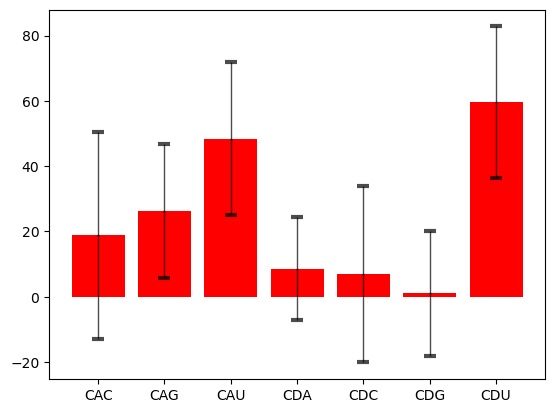

In [14]:
#make plot with average and sd
#transpose
whole_statistics_Transposed = whole_statistics.T
print(whole_statistics_Transposed)
temp_stats = pd.DataFrame(whole_statistics_Transposed)
x_axis_labels = ['CAC', 'CAG', 'CAU', 'CDA', 'CDC', 'CDG', 'CDU']
LIE_means = list(temp_stats.iloc[1:,1])
LIE_std = list(temp_stats.iloc[1:,2])
LIE_min = list(temp_stats.iloc[1:,3])
LIE_25 = list(temp_stats.iloc[1:,4])
LIE_50 = list(temp_stats.iloc[1:,5])
LIE_75 = list(temp_stats.iloc[1:,6])
LIE_max = list(temp_stats.iloc[1:,7])

print(LIE_means)
#temp2_CAC_stats = list(temp_CAC_stats.iloc[:,0])

#temp2_CAC_stats = list(temp_CAC_stats.iloc[:,0])
#
#whole_output1['CAC'].hist(bins=1000, density=True)
#whole_statistics['mean'].bar(bins=1000, density=True)
#fig, ax = plt.subplots
plt.bar(x_axis_labels,LIE_means, color = "red")
plt.errorbar(x_axis_labels,LIE_means, LIE_std, fmt='.', color='Black', elinewidth=1,capthick=3,errorevery=1, alpha=0.7, ms=1, capsize = 4)
#plt.plot(whole_statistics['mean'], density = True, color = "red") 
#
#Stat

      Frame      CAC      CAG      CAU      CDA      CDC      CDG      CDU
0         1  17.5946  39.1095  13.9377  15.7239  15.8097 -34.6942  12.5558
1         2  -3.2086  53.1244  31.0417  18.9786  -3.0816  -3.1970  19.0924
2         3  15.9892  32.5737  43.3980 -13.0083  -2.8215  20.4416  49.8823
3         4  23.9485  57.9509  37.2092  13.4920  22.4380  18.9490  29.1672
4         5 -41.8454  50.2730  58.3324   3.8924 -14.2687   7.9426   7.9658
...     ...      ...      ...      ...      ...      ...      ...      ...
4995   4996  -1.2954   6.1835  -6.4242 -39.2412  37.2062  -5.6672  81.1069
4996   4997   7.2432  10.9038  22.9084 -13.9870  47.5466  -1.1359  97.3382
4997   4998 -19.6927  24.4424  17.5593 -10.2462  30.6603 -26.8135  72.0115
4998   4999 -16.6236   9.8512  51.0876 -16.3244   9.7705  -5.0337  65.1765
4999   5000 -17.8323   9.9750  12.8277   5.4407  20.0402  -4.4344  54.3670

[5000 rows x 8 columns]
       level_0 level_1        0
0            0     CAC  17.5946
1          

<AxesSubplot:xlabel='Ligand', ylabel='BSLIE'>

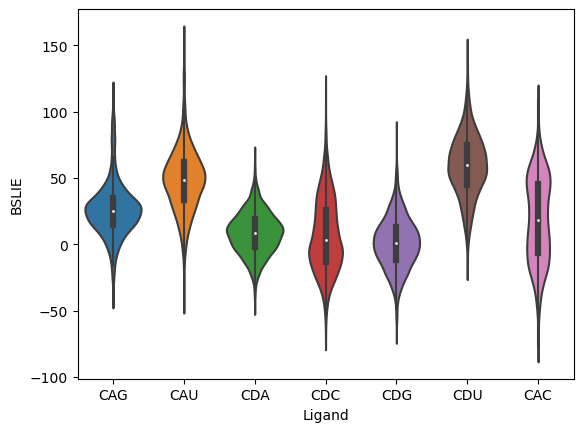

In [48]:
#make violin plot
print(whole_output1.iloc[0:5000,0:9])
ligand_binding_energies = pd.DataFrame(whole_output1.iloc[0:5000,1:9])
#print(whole_output1.iloc[0:5000,1])
seaborn_dataset = pd.DataFrame(ligand_binding_energies.stack().reset_index())
print(seaborn_dataset)
seaborn_ds_columns = ['Ligand', 'BSLIE']
print(seaborn_dataset.iloc[1:35000,1:3])
preprepped_dataset = pd.DataFrame(seaborn_dataset.iloc[1:35000,1:3])
preprepped_dataset.columns = seaborn_ds_columns
#print(preprepped_dataset)
##sns.set(style ='whitegrid')
sns.violinplot(x = preprepped_dataset['Ligand'], y = preprepped_dataset['BSLIE'])


In [25]:
print(ligand_binding_energies.stack().reset_index())

       level_0 level_1        0
0            0   Frame   1.0000
1            0     CAC  17.5946
2            0     CAG  39.1095
3            0     CAU  13.9377
4            0     CDA  15.7239
...        ...     ...      ...
39995     4999     CAU  12.8277
39996     4999     CDA   5.4407
39997     4999     CDC  20.0402
39998     4999     CDG  -4.4344
39999     4999     CDU  54.3670

[40000 rows x 3 columns]


<AxesSubplot:xlabel='Ligand', ylabel='BSLIE'>

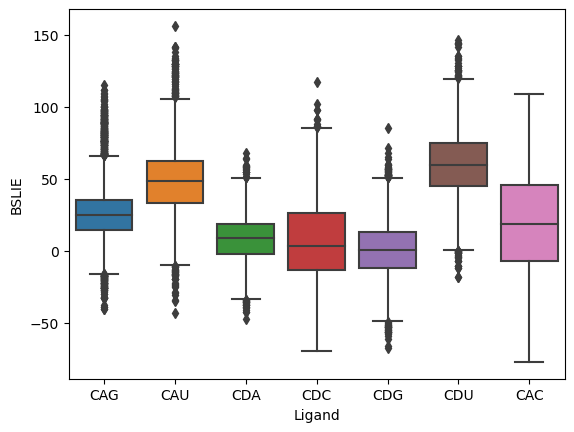

In [49]:
#make box and whisker plot
sns.boxplot(x = preprepped_dataset['Ligand'], y = preprepped_dataset['BSLIE'])
